D208 - Predictive Modeling - Task 1

By Krista Moik

In [1]:
#import packages, as suggested in WGU course materials
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [2]:
#Load medical_clean CSV
df=pd.read_csv('C:/Users/Kmoik WGU/Desktop/D208/medical_clean.csv')

In [3]:
#View data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
#check for duplicates
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


Confirmed there are no duplicates

In [5]:
#check for null values - even though view of data indicates no nulls
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

Confirmed no nulls in the data set

In [6]:
#statistically describe dependent variable - Initial_days
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [7]:
df.Initial_days.value_counts()

Initial_days
63.544320    2
67.421390    2
70.325420    2
63.334690    1
67.036510    1
            ..
5.977596     1
5.799041     1
6.415853     1
7.328631     1
70.850590    1
Name: count, Length: 9997, dtype: int64

<Axes: xlabel='Initial_days'>

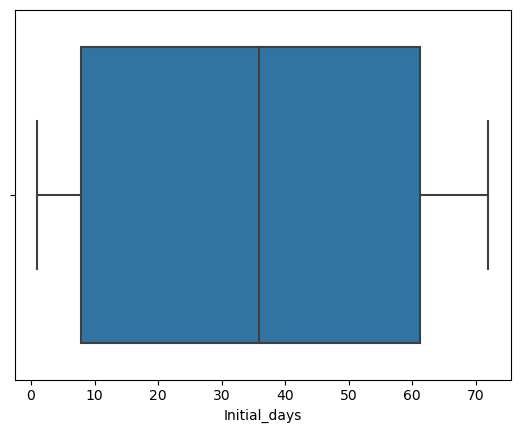

In [8]:
sns.boxplot(df, x='Initial_days')

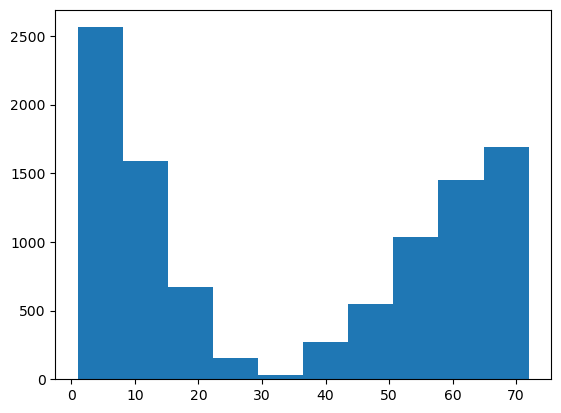

In [9]:
plt.hist(df['Initial_days'])
plt.show()

In [10]:
#Statistically describe independent variable - Children
df.Children.describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

In [11]:
df.Children.value_counts()

Children
0     2548
1     2509
3     1489
2     1475
4      995
7      213
8      209
6      191
5      169
9      108
10      94
Name: count, dtype: int64

<Axes: xlabel='Children'>

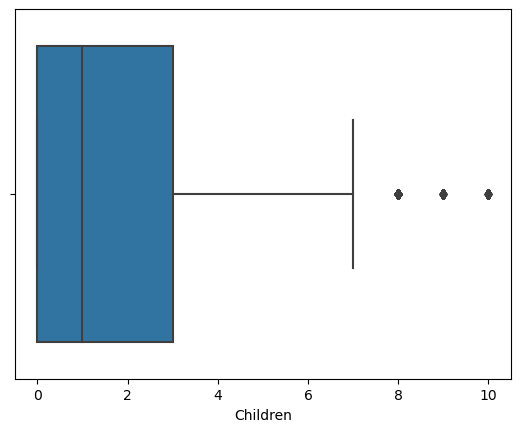

In [12]:
sns.boxplot(df, x='Children')

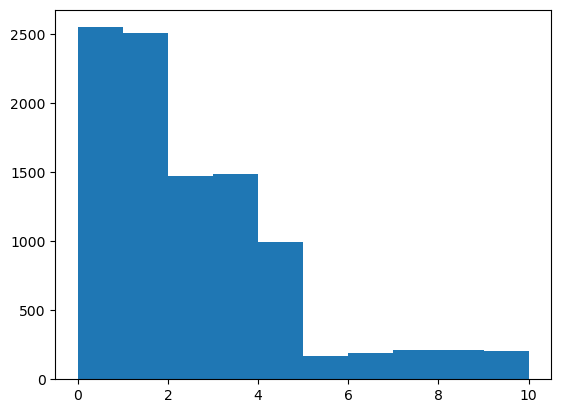

In [13]:
plt.hist(df['Children'])
plt.show()

In [14]:
#Statistically describe independent variable - Age
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

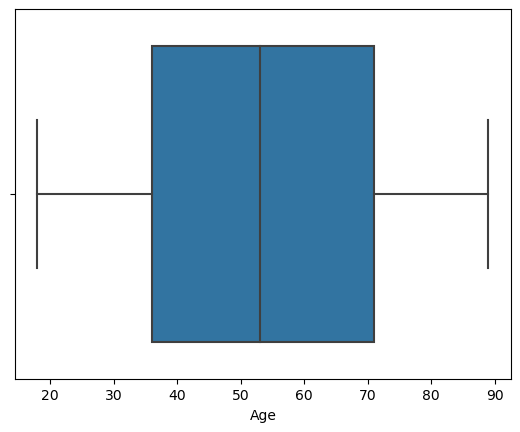

In [15]:
sns.boxplot(df, x='Age')

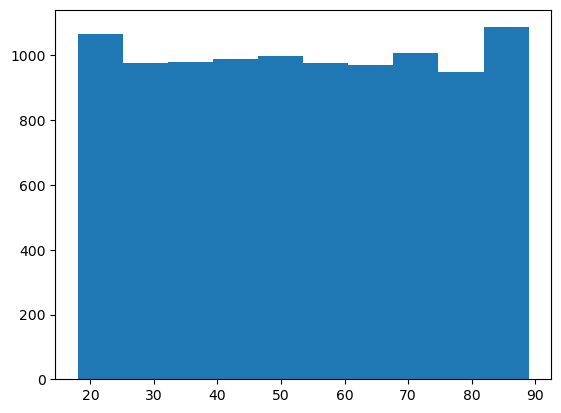

In [16]:
plt.hist(df['Age'])
plt.show()

In [17]:
#Statistically describe independent variable - Income
df.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

<Axes: xlabel='Income'>

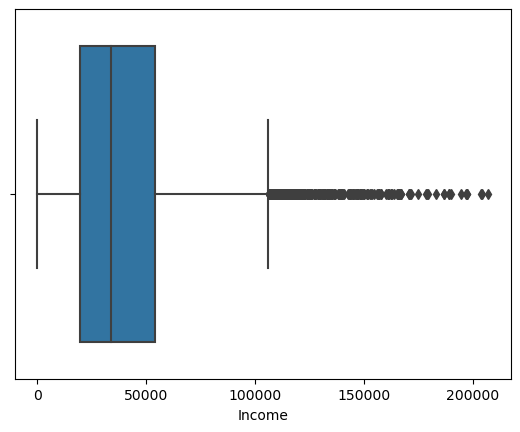

In [18]:
sns.boxplot(df, x='Income')

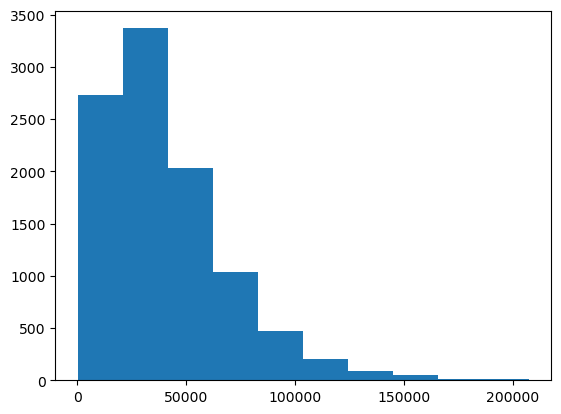

In [19]:
plt.hist(df['Income'])
plt.show()

In [20]:
#Statistically describe independent variable - Marital
df.Marital.describe()

count       10000
unique          5
top       Widowed
freq         2045
Name: Marital, dtype: object

In [21]:
df.Marital.value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

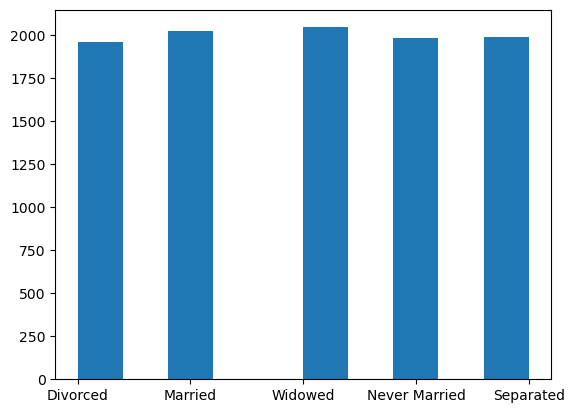

In [22]:
#unable to create boxplot for categorical data
plt.hist(df['Marital'])
plt.show()

In [23]:
#Statistically describe independent variable - Gender
df.Gender.describe()

count      10000
unique         3
top       Female
freq        5018
Name: Gender, dtype: object

In [24]:
df.Gender.value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

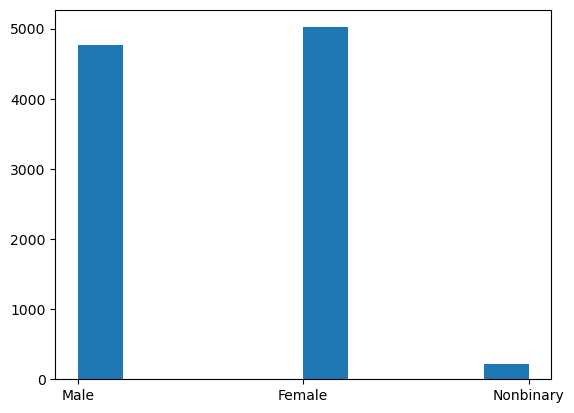

In [25]:
#unable to create boxplot for categorical data
plt.hist(df['Gender'])
plt.show()

In [26]:
#Statistically describe independent variable - Doc_visits
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [27]:
df.Doc_visits.value_counts()

Doc_visits
5    3823
6    2436
4    2385
7     634
3     595
8      61
2      58
1       6
9       2
Name: count, dtype: int64

<Axes: xlabel='Doc_visits'>

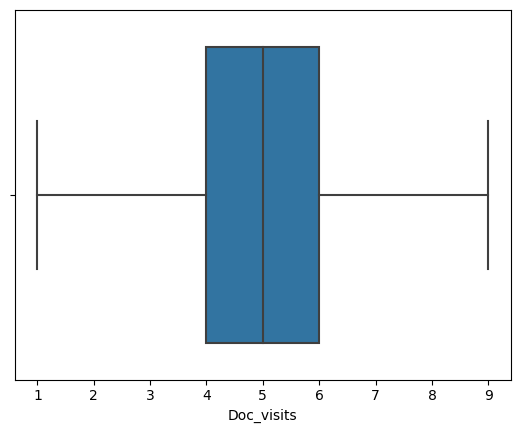

In [28]:
sns.boxplot(df, x='Doc_visits')

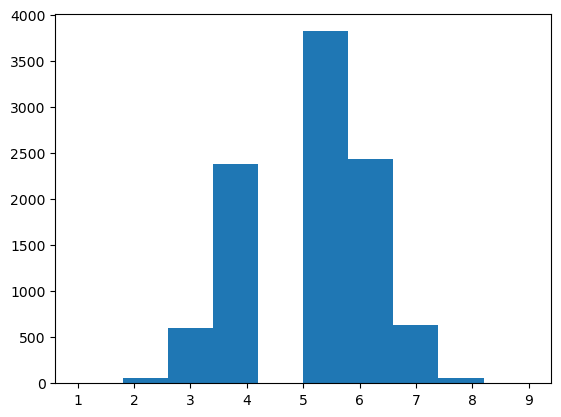

In [29]:
plt.hist(df['Doc_visits'])
plt.show()

In [30]:
#Statistically describe independent variable - Initial_admin
df.Initial_admin.describe()

count                   10000
unique                      3
top       Emergency Admission
freq                     5060
Name: Initial_admin, dtype: object

In [31]:
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

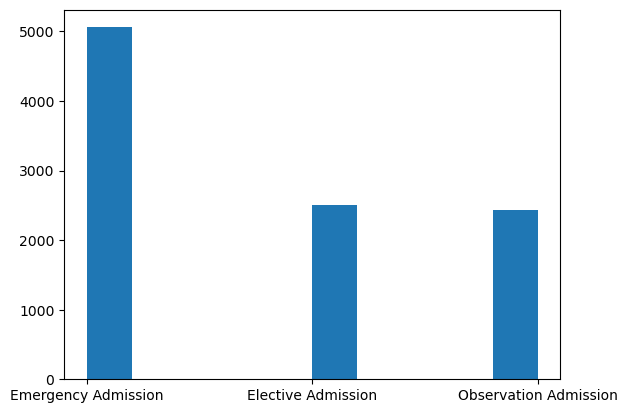

In [32]:
#unable to create boxplot for categorical data
plt.hist(df['Initial_admin'])
plt.show()

In [33]:
#Statistically describe independent variable - HighBlood
df.HighBlood.describe()

count     10000
unique        2
top          No
freq       5910
Name: HighBlood, dtype: object

In [34]:
df.HighBlood.value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

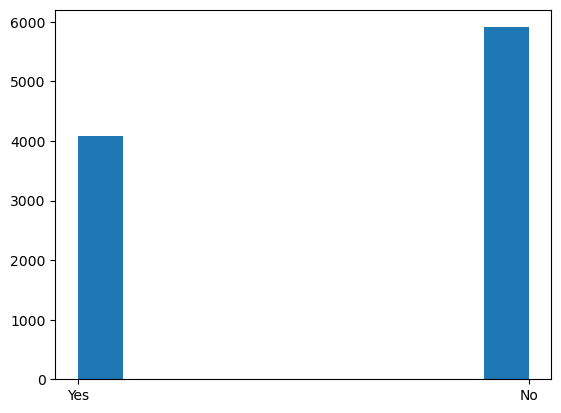

In [35]:
#unable to create boxplot for categorical data
plt.hist(df['HighBlood'])
plt.show()

In [36]:
#Statistically describe independent variable - Stroke
df.Stroke.describe()

count     10000
unique        2
top          No
freq       8007
Name: Stroke, dtype: object

In [37]:
df.Stroke.value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

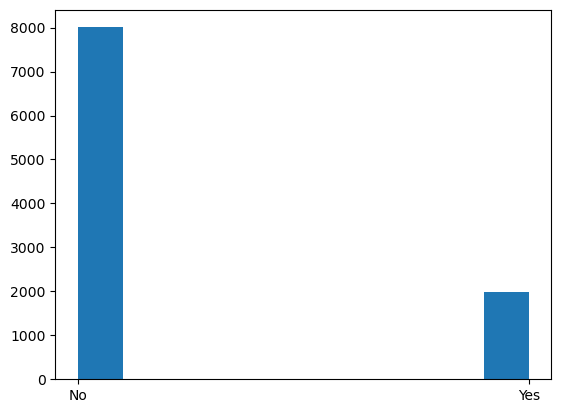

In [38]:
#unable to create boxplot for categorical data
plt.hist(df['Stroke'])
plt.show()

In [39]:
#Statistically describe independent variable - Complication_risk
df.Complication_risk.describe()

count      10000
unique         3
top       Medium
freq        4517
Name: Complication_risk, dtype: object

In [40]:
df.Complication_risk.value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

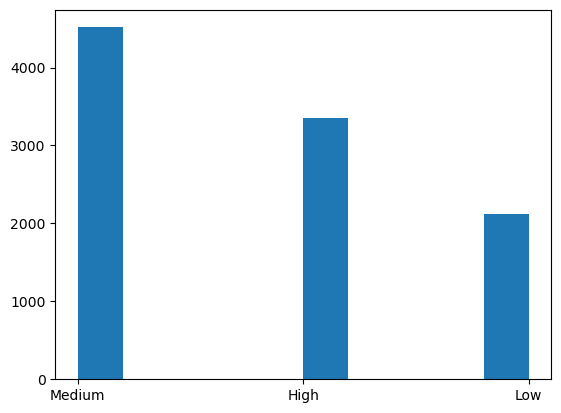

In [41]:
#unable to create boxplot for categorical data
plt.hist(df['Complication_risk'])
plt.show()

In [42]:
#Statistically describe independent variable - Overweight
df.Overweight.describe()

count     10000
unique        2
top         Yes
freq       7094
Name: Overweight, dtype: object

In [43]:
df.Overweight.value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

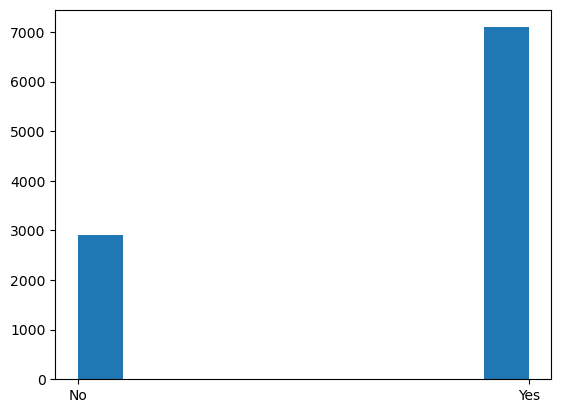

In [44]:
#unable to create boxplot for categorical data
plt.hist(df['Overweight'])
plt.show()

In [45]:
#Statistically describe independent variable - Diabetes
df.Diabetes.describe()

count     10000
unique        2
top          No
freq       7262
Name: Diabetes, dtype: object

In [46]:
df.Diabetes.value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

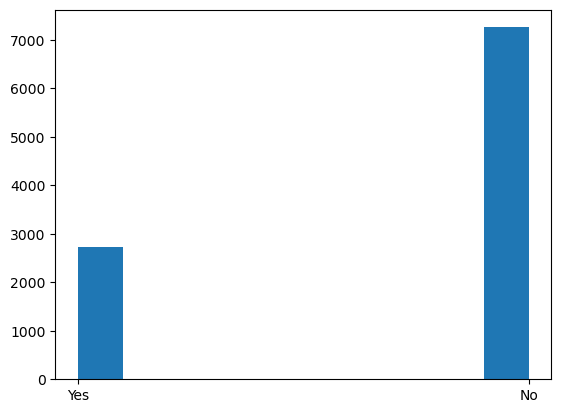

In [47]:
#unable to create boxplot for categorical data
plt.hist(df['Diabetes'])
plt.show()

In [48]:
#Statistically describe independent variable - Anxiety
df.Anxiety.describe()

count     10000
unique        2
top          No
freq       6785
Name: Anxiety, dtype: object

In [49]:
df.Anxiety.value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

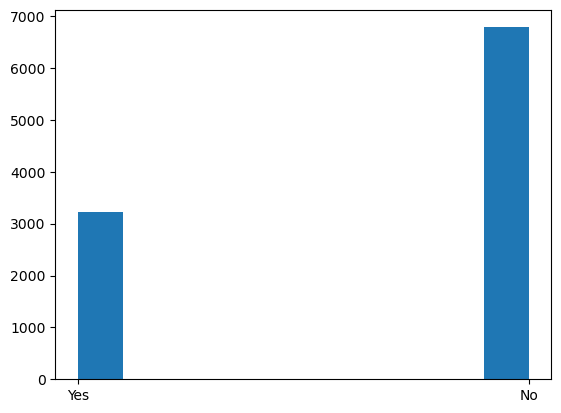

In [50]:
#unable to create boxplot for categorical data
plt.hist(df['Anxiety'])
plt.show()

In D206, I kept all outliers as reasonable.  Confirmed the data has not changed between courses.  I stand by my decision to retain all outliers as I find them reasonable within this data set.

C3: Bivariate visualizations of the distributions of the dependent and independent variables, including the dependent variable in your bivariate visualizations.

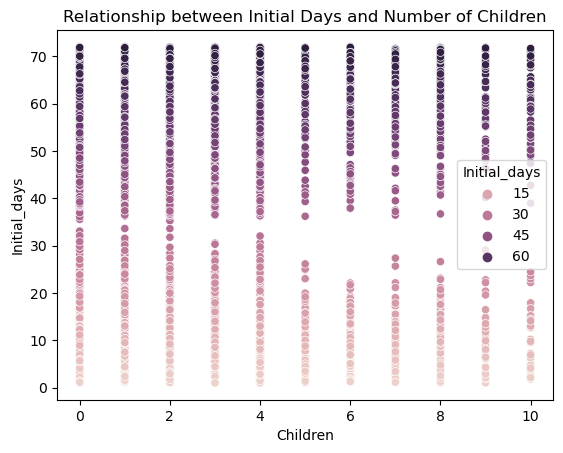

In [51]:
#Bivariate visualization of Initial_days and Children using scatterplots
sns.scatterplot(x='Children', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and Number of Children")
plt.show()

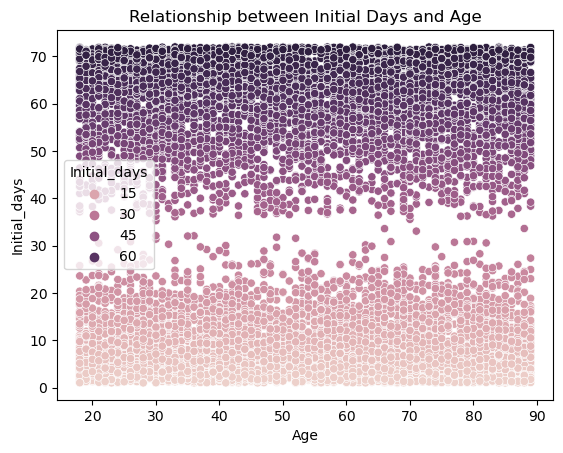

In [52]:
#Bivariate visualization of Initial_days and Age using scatterplots
sns.scatterplot(x='Age', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and Age")
plt.show()

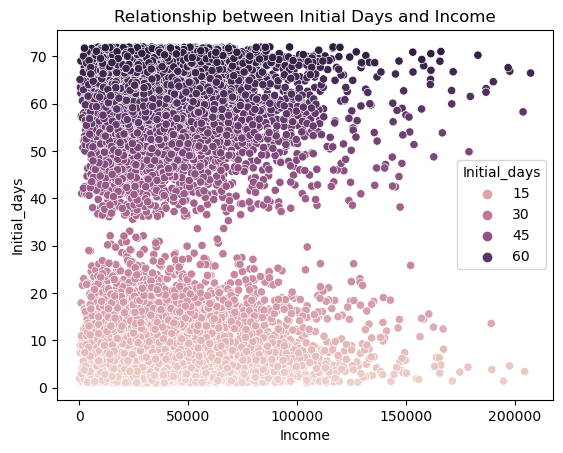

In [53]:
#Bivariate visualization of Initial_days and Income using scatterplots
sns.scatterplot(x='Income', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and Income")
plt.show()

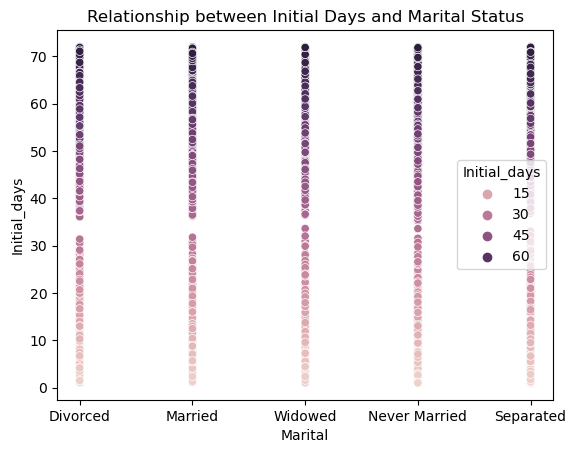

In [54]:
#Bivariate visualization of Initial_days and Marital using scatterplots
sns.scatterplot(x='Marital', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and Marital Status")
plt.show()

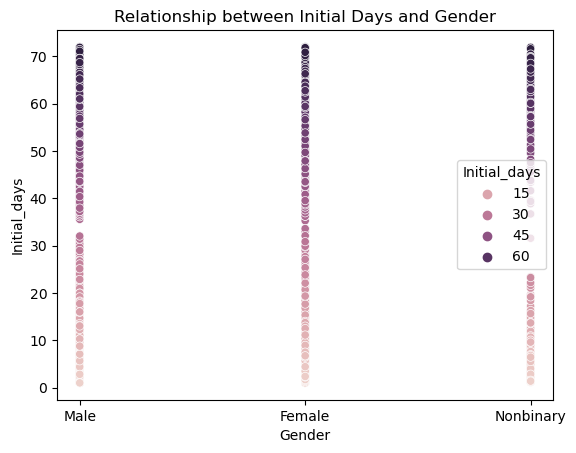

In [55]:
#Bivariate visualization of Initial_days and Gender using scatterplots
sns.scatterplot(x='Gender', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and Gender")
plt.show()

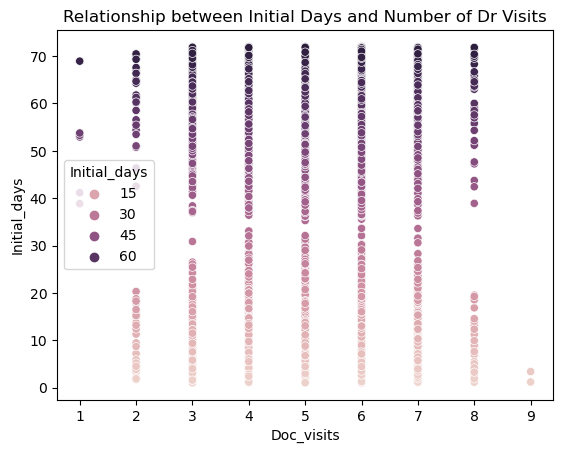

In [56]:
#Bivariate visualization of Initial_days and Doc_visits using scatterplots
sns.scatterplot(x='Doc_visits', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and Number of Dr Visits")
plt.show()

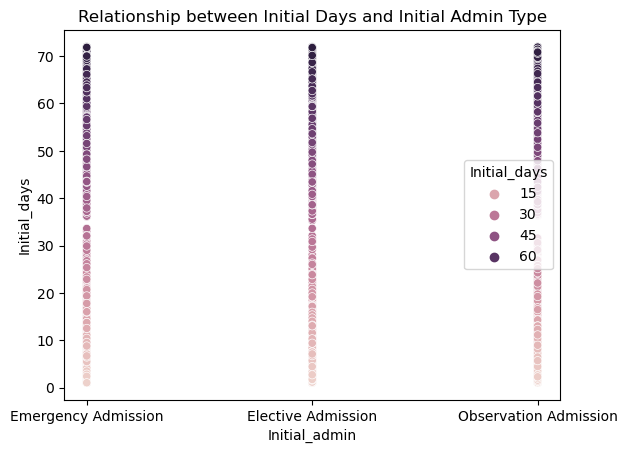

In [57]:
#Bivariate visualization of Initial_days and Initial_admin using scatterplots
sns.scatterplot(x='Initial_admin', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and Initial Admin Type")
plt.show()

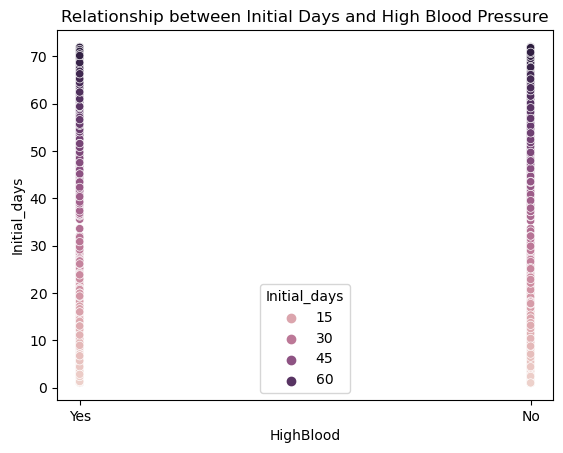

In [58]:
#Bivariate visualization of Initial_days and HighBlood using scatterplots
sns.scatterplot(x='HighBlood', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and High Blood Pressure")
plt.show()

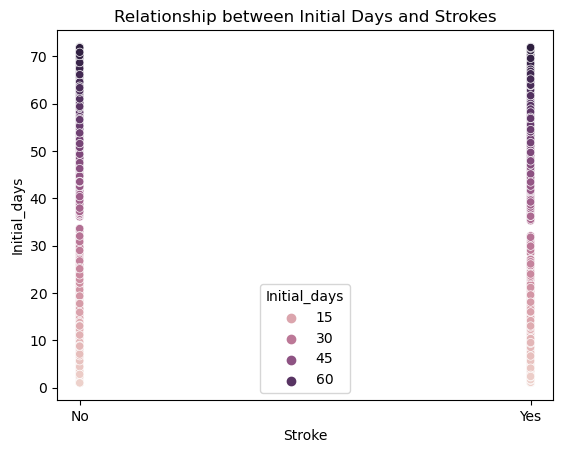

In [59]:
#Bivariate visualization of Initial_days and Stroke using scatterplots
sns.scatterplot(x='Stroke', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and Strokes")
plt.show()

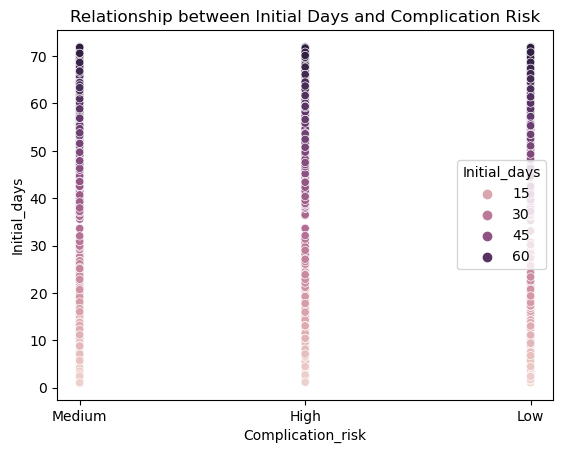

In [60]:
#Bivariate visualization of Initial_days and Complication_risk using scatterplots
sns.scatterplot(x='Complication_risk', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and Complication Risk")
plt.show()

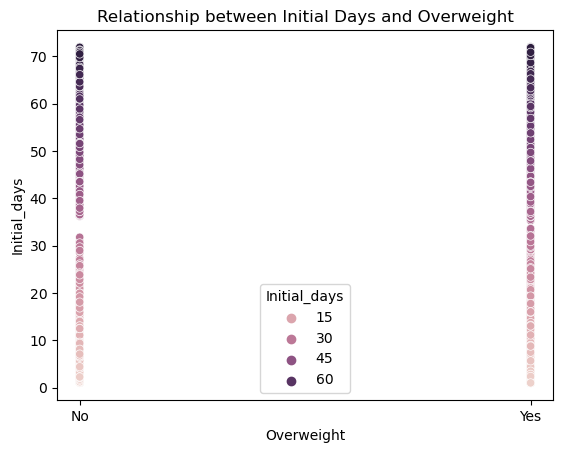

In [61]:
#Bivariate visualization of Initial_days and Overweight using scatterplots
sns.scatterplot(x='Overweight', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and Overweight")
plt.show()

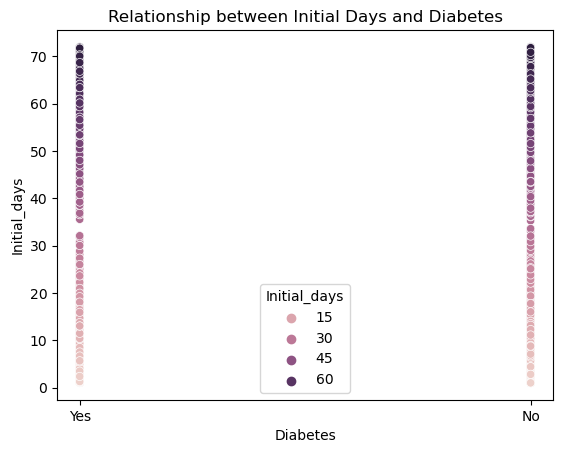

In [62]:
#Bivariate visualization of Initial_days and Diabetes using scatterplots
sns.scatterplot(x='Diabetes', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and Diabetes")
plt.show()

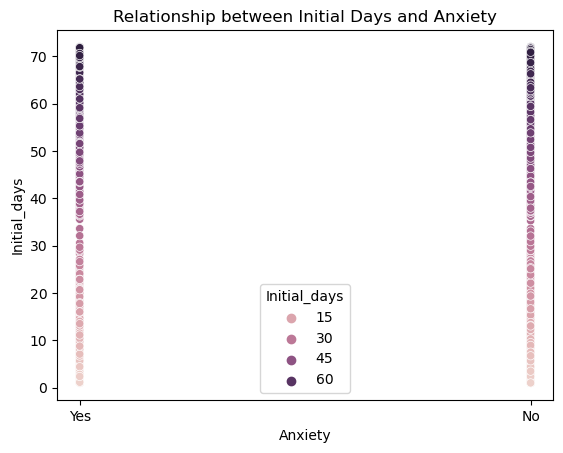

In [63]:
#Bivariate visualization of Initial_days and Anxiety using scatterplots
sns.scatterplot(x='Anxiety', y='Initial_days', hue='Initial_days', data=df).set(title="Relationship between Initial Days and Anxiety")
plt.show()

Re-Expression of Categorical Values

In [64]:
#re-expressing Overweight
df['Overweight_numeric']=df['Overweight']

In [65]:
#set up dictionary
dict_overweight={'Overweight_numeric' : {'No':0, 'Yes':1}}

In [66]:
#replace variable's values
df.replace(dict_overweight, inplace=True)

In [67]:
# drop original column
df=df.drop(columns=['Overweight'])

In [68]:
#re-expressing Diabetes
df['Diabetes_numeric']=df['Diabetes']

In [69]:
#set up dictionary
dict_diabetes={'Diabetes_numeric' : {'No':0, 'Yes':1}}

In [70]:
#replace variable's values
df.replace(dict_diabetes, inplace=True)

In [71]:
# drop original column
df=df.drop(columns=['Diabetes'])

In [72]:
#re-expressing Anxiety
df['Anxiety_numeric']=df['Anxiety']

In [73]:
#set up dictionary
dict_anxiety={'Anxiety_numeric' : {'No':0, 'Yes':1}}

In [74]:
#replace variable's values
df.replace(dict_anxiety, inplace=True)

In [75]:
# drop original column
df=df.drop(columns=['Anxiety'])

In [76]:
#re-expressing HighBlood
df['HighBlood_numeric']=df['HighBlood']

In [77]:
#set up dictionary
dict_highblood={'HighBlood_numeric' : {'No':0, 'Yes':1}}

In [78]:
#replace variable's values
df.replace(dict_highblood, inplace=True)

In [79]:
# drop original column
df=df.drop(columns=['HighBlood'])

In [80]:
#re-expressing Stroke
df['Stroke_numeric']=df['Stroke']

In [81]:
#set up dictionary
dict_stroke={'Stroke_numeric' : {'No':0, 'Yes':1}}

In [82]:
#replace variable's values
df.replace(dict_stroke, inplace=True)

In [83]:
# drop original column
df=df.drop(columns=['Stroke'])

In [84]:
#check data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [85]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)

In [86]:
onehot_encoded=onehot_encoder.fit_transform(df[['Gender', 'Marital', 'Complication_risk', 'Initial_admin']])

C:\Users\Kmoik WGU\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [87]:
df_encoded=pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['Gender', 'Marital', 'Complication_risk', 'Initial_admin']))

In [88]:
#drop first columns to reduce multicollinearity
df_encoded.drop(['Gender_Female', 'Marital_Divorced', 'Complication_risk_High', 'Initial_admin_Elective Admission'], axis=1, inplace=True)

In [89]:
#merging encoded columns to df
df=pd.concat([df, df_encoded], axis=1)

In [90]:
#check data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

In [91]:
#drop unused columns
df.drop(['Initial_admin', 'Complication_risk', 'Gender', 'Marital', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'ReAdmis', 'VitD_levels', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Arthritis', 'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1, inplace=True)

In [92]:
#confirm data set has been updated appropriately
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Children                             10000 non-null  int64  
 1   Age                                  10000 non-null  int64  
 2   Income                               10000 non-null  float64
 3   Doc_visits                           10000 non-null  int64  
 4   Initial_days                         10000 non-null  float64
 5   Overweight_numeric                   10000 non-null  int64  
 6   Diabetes_numeric                     10000 non-null  int64  
 7   Anxiety_numeric                      10000 non-null  int64  
 8   HighBlood_numeric                    10000 non-null  int64  
 9   Stroke_numeric                       10000 non-null  int64  
 10  Gender_Male                          10000 non-null  float64
 11  Gender_Nonbinary             

In [93]:
clean_df=df.copy(deep=True)

In [94]:
clean_df.to_csv('C:/Users/Kmoik WGU/Desktop/KMoikclean_medical.csv')

Part IV: Model Comparisons and Analysis

In [95]:
#dependent variable for OLS
y=df['Initial_days']

In [96]:
#independent variables for OLS
X=df[['Children', 'Age', 'Income', 'Doc_visits', 'Overweight_numeric', 'Diabetes_numeric', 'Anxiety_numeric', 'HighBlood_numeric', 'Stroke_numeric', 'Gender_Male', 'Gender_Nonbinary', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Complication_risk_Medium', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission']]

In [97]:
#add constant
X=sm.add_constant(X)

In [98]:
#fit linear regression model - OLS
df['Intercept']=1
model=sm.OLS(y,X).fit()

In [99]:
#view linear regression model - OLS
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.334
Date:                Thu, 01 Feb 2024   Prob (F-statistic):              0.150
Time:                        13:57:51   Log-Likelihood:                -46875.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9980   BIC:                         9.394e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Our R Squared value is only 0.003 which indicates that these variables do not have a high probability of affecting the number of initial days of hospitalization, but the model also indicates there is strong multicollinearity

In [100]:
#set independent variable for VIF
X=df[['Children', 'Age', 'Income', 'Doc_visits', 'Overweight_numeric', 'Diabetes_numeric', 'Anxiety_numeric', 'HighBlood_numeric', 'Stroke_numeric', 'Gender_Male', 'Gender_Nonbinary', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Complication_risk_Medium', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission']]

In [101]:
#VIF dataframe
vif_df=pd.DataFrame()
vif_df["feature"]=X.columns

In [102]:
#calculate VIF for all independent variables
vif_df["VIF"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [103]:
print(vif_df)

                                feature        VIF
0                              Children   1.904355
1                                   Age   6.635519
2                                Income   2.889753
3                            Doc_visits  12.735734
4                    Overweight_numeric   3.284719
5                      Diabetes_numeric   1.369569
6                       Anxiety_numeric   1.460602
7                     HighBlood_numeric   1.677480
8                        Stroke_numeric   1.243162
9                           Gender_Male   1.904398
10                     Gender_Nonbinary   1.041556
11                      Marital_Married   1.921127
12                Marital_Never Married   1.886120
13                    Marital_Separated   1.896776
14                      Marital_Widowed   1.924777
15                Complication_risk_Low   1.591768
16             Complication_risk_Medium   2.259976
17    Initial_admin_Emergency Admission   2.862566
18  Initial_admin_Observation A

In [104]:
#reducing model - removing Doc_visits which has the highest VIF of 12.7 indicating high multicollinearity
X=df[['Children', 'Age', 'Income', 'Overweight_numeric', 'Diabetes_numeric', 'Anxiety_numeric', 'HighBlood_numeric', 'Stroke_numeric', 'Gender_Male', 'Gender_Nonbinary', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Complication_risk_Medium', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission']]

In [105]:
#VIF dataframe
vif_df=pd.DataFrame()
vif_df["feature"]=X.columns

In [106]:
#calculating VIF for independent variables
vif_df["VIF"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [107]:
print(vif_df)

                                feature       VIF
0                              Children  1.871955
1                                   Age  5.607090
2                                Income  2.749537
3                    Overweight_numeric  3.113494
4                      Diabetes_numeric  1.356744
5                       Anxiety_numeric  1.448349
6                     HighBlood_numeric  1.656069
7                        Stroke_numeric  1.237705
8                           Gender_Male  1.865492
9                      Gender_Nonbinary  1.039609
10                      Marital_Married  1.831676
11                Marital_Never Married  1.790556
12                    Marital_Separated  1.803622
13                      Marital_Widowed  1.830069
14                Complication_risk_Low  1.560728
15             Complication_risk_Medium  2.196086
16    Initial_admin_Emergency Admission  2.686578
17  Initial_admin_Observation Admission  1.823480


No remaining values have a VIF over 10, will look at the OLS model again

In [108]:
#re-run OLS without the independent variable that we removed
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Age', 'Income', 'Overweight_numeric', 'Diabetes_numeric', 'Anxiety_numeric', 'HighBlood_numeric', 'Stroke_numeric', 'Gender_Male', 'Gender_Nonbinary', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Complication_risk_Medium', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission']]

In [109]:
#add constant
X=sm.add_constant(X)

In [110]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [111]:
#view linear regression model - OLS
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.390
Date:                Thu, 01 Feb 2024   Prob (F-statistic):              0.125
Time:                        13:57:52   Log-Likelihood:                -46876.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9981   BIC:                         9.393e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

Our probability that these variables affect the dependent variable is still 0.003, however, there is still a note that there is strong multicollinearity and as we can see, many of our variables have a values greater than our .05 alpha

In [112]:
#rerun OLS after dropping Complication_risk_Medium which as a p values of 0.915
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Age', 'Income', 'Overweight_numeric', 'Diabetes_numeric', 'Anxiety_numeric', 'HighBlood_numeric', 'Stroke_numeric', 'Gender_Male', 'Gender_Nonbinary', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission']]

In [113]:
#add constant
X=sm.add_constant(X)

In [114]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [115]:
#view linear regression model - OLS - with Complication_risk_Medium removed
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.471
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0948
Time:                        13:57:52   Log-Likelihood:                -46876.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9982   BIC:                         9.392e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [116]:
#rerun OLS after dropping Stroke_numeric which has p values of 0.849
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Age', 'Income', 'Overweight_numeric', 'Diabetes_numeric', 'Anxiety_numeric', 'HighBlood_numeric', 'Gender_Male', 'Gender_Nonbinary', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission']]

In [117]:
#add constant
X=sm.add_constant(X)

In [118]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [119]:
#view linear regression model - OLS - without Stroke_numeric
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.561
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0705
Time:                        13:57:52   Log-Likelihood:                -46876.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9983   BIC:                         9.391e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [120]:
#rerun OLS after dropping Diabetes_numeric which has p values of 0.738
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Age', 'Income', 'Overweight_numeric', 'Anxiety_numeric', 'HighBlood_numeric', 'Gender_Male', 'Gender_Nonbinary', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission']]

In [121]:
#add constant
X=sm.add_constant(X)

In [122]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [123]:
#view linear regression model - OLS - without Diabetes_numeric
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.658
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0520
Time:                        13:57:52   Log-Likelihood:                -46876.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9984   BIC:                         9.390e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [124]:
#rerun OLS after dropping Initial_admin_Observation Admission which has p values of 0.721
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Income', 'Overweight_numeric', 'Anxiety_numeric', 'HighBlood_numeric', 'Gender_Male', 'Gender_Nonbinary', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Initial_admin_Emergency Admission']]

In [125]:
#add constant
X=sm.add_constant(X)

In [126]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [127]:
#view linear regression model - OLS - without Initial_admin_Observation Admission
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.707
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0527
Time:                        13:57:52   Log-Likelihood:                -46877.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9986   BIC:                         9.388e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [128]:
#rerun OLS after dropping HighBlood_numeric which has p values of 0.591
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Income', 'Overweight_numeric', 'Anxiety_numeric', 'Gender_Male', 'Gender_Nonbinary', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Initial_admin_Emergency Admission']]

In [129]:
#add constant
X=sm.add_constant(X)

In [130]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [131]:
#view linear regression model - OLS - without HighBlood_numeric
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.825
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0388
Time:                        13:57:53   Log-Likelihood:                -46877.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9987   BIC:                         9.387e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [132]:
#rerun OLS after dropping Gender_Nonbinary which has p values of 0.554
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Age', 'Income', 'Overweight_numeric', 'Anxiety_numeric', 'Gender_Male', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Initial_admin_Emergency Admission']]

In [133]:
#add constant
X=sm.add_constant(X)

In [134]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [135]:
#view linear regression model - OLS - without Gender_Nonbinary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.008
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0199
Time:                        13:57:53   Log-Likelihood:                -46876.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9987   BIC:                         9.387e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [136]:
#rerun OLS after dropping Gender_Male which has p values of 0.480
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Age', 'Income', 'Overweight_numeric', 'Anxiety_numeric', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Initial_admin_Emergency Admission']]

In [137]:
#add constant
X=sm.add_constant(X)

In [138]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [139]:
#view linear regression model - OLS without Gender_Male
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.145
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0146
Time:                        13:57:53   Log-Likelihood:                -46876.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9988   BIC:                         9.386e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [140]:
#rerun OLS after dropping Overweight_numeric which has p values of 0.269
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Age', 'Income', 'Anxiety_numeric', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Initial_admin_Emergency Admission']]

In [141]:
#add constant
X=sm.add_constant(X)

In [142]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [143]:
#view linear regression model - OLS without Overweight_numeric
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.237
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0134
Time:                        13:57:53   Log-Likelihood:                -46877.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9989   BIC:                         9.386e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [144]:
#rerun OLS after dropping Anxiety_numeric which has p values of 0.236
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Age', 'Income', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low', 'Initial_admin_Emergency Admission']]

In [145]:
#add constant
X=sm.add_constant(X)

In [146]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [147]:
#view linear regression model - OLS without Anxiety_numeric
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.329
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0129
Time:                        13:57:53   Log-Likelihood:                -46878.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9990   BIC:                         9.385e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [148]:
#rerun OLS after dropping Initial_admin_Emergency Admission which has p value of 0.235
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Age', 'Income', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low']]

In [149]:
#add constant
X=sm.add_constant(X)

In [150]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [151]:
#view linear regression model - OLS without Initial_admin_Emergency Admission
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.444
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0122
Time:                        13:57:53   Log-Likelihood:                -46878.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9991   BIC:                         9.384e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    31.66

In [152]:
#rerun OLS after dropping Income which has p values of 0.219
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Age', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low']]

In [153]:
#add constant
X=sm.add_constant(X)

In [154]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [155]:
#view linear regression model - OLS without Income
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.577
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0119
Time:                        13:57:53   Log-Likelihood:                -46879.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9992   BIC:                         9.383e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    31.18

In [156]:
#rerun OLS after dropping Marital_Married  which has p values of 0.126
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Age', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_Low']]

In [157]:
#add constant
X=sm.add_constant(X)

In [158]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [159]:
#view linear regression model - OLS without Marital_Married
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.622
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0153
Time:                        13:57:53   Log-Likelihood:                -46880.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9993   BIC:                         9.382e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    31.81

In [160]:
#rerun OLS after dropping Marital_Widowed which has a p values of 0.149
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Marital_Never Married', 'Marital_Separated', 'Complication_risk_Low']]

In [161]:
#add constant
X=sm.add_constant(X)

In [162]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [163]:
#view linear regression model - OLS without Marital_Widowed
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.748
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0267
Time:                        13:57:53   Log-Likelihood:                -46883.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9995   BIC:                         9.381e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    33.28

In [164]:
#rerun OLS after dropping Marital_Never Married which now has a p value of 0.235
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Marital_Separated', 'Complication_risk_Low']]

In [165]:
#add constant
X=sm.add_constant(X)

In [166]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [167]:
#view linear regression model - OLS without Marital_Never Married
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.194
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0225
Time:                        13:57:53   Log-Likelihood:                -46883.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9996   BIC:                         9.380e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    33.49

In [168]:
#rerun OLS after dropping Marital_Separated which has a p values of 0.340
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children', 'Complication_risk_Low']]

In [169]:
#add constant
X=sm.add_constant(X)

In [170]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [171]:
#view linear regression model - OLS without Marital_Separated
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.336
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0131
Time:                        13:57:53   Log-Likelihood:                -46884.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9997   BIC:                         9.380e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    33.62

In [172]:
#rerun OLS after dropping Complication_risk_Low which has a p values of 0.057
#dependent variable
y=df['Initial_days']
#independent variables
X=df[['Children']]

In [173]:
#add constant
X=sm.add_constant(X)

In [174]:
#fit linear regression model - OLS
model=sm.OLS(y,X).fit()

In [175]:
#view linear regression model - OLS without Complication_risk_Low
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.049
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0247
Time:                        13:57:53   Log-Likelihood:                -46886.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9998   BIC:                         9.379e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8824      0.366     92.490      0.0

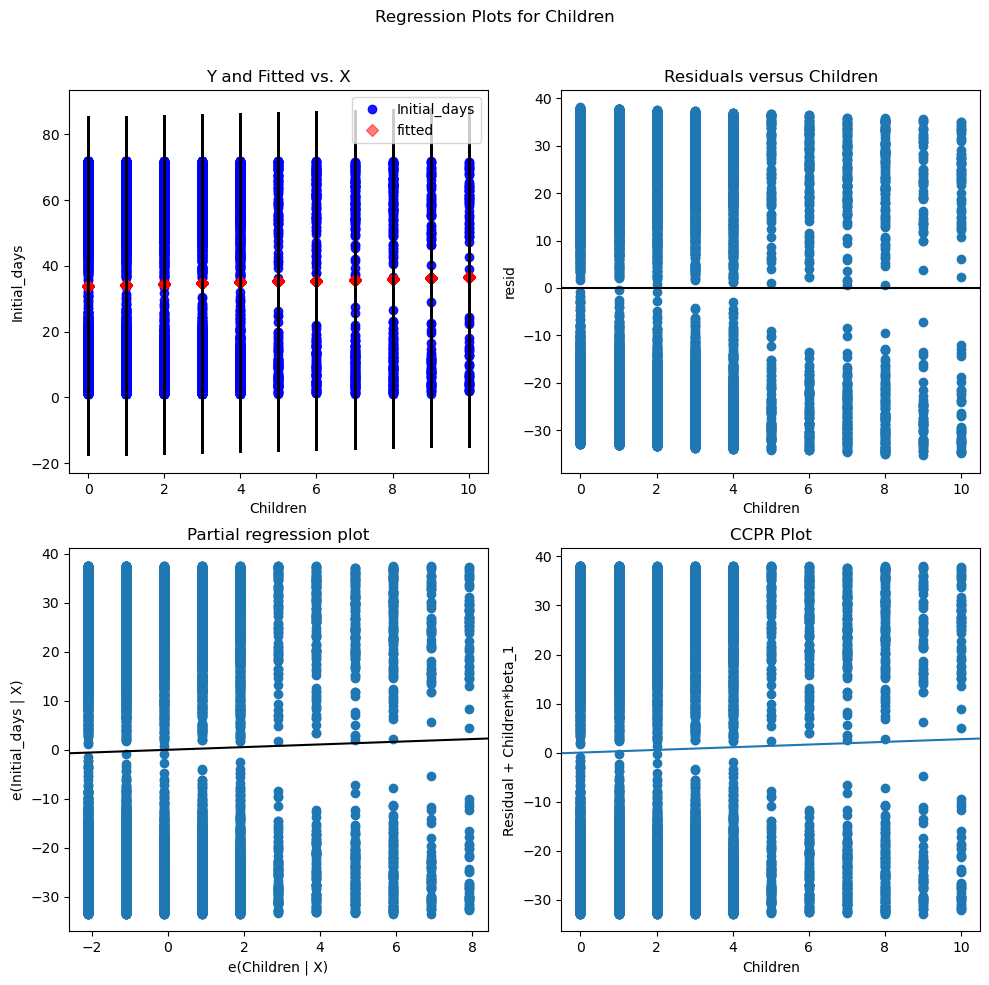

In [176]:
#residual plot
y=df['Initial_days']
X=df['Children']
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
fig=sm.graphics.plot_regress_exog(model, 'Children', fig=plt.figure(figsize=(10,10)))
plt.show()

In [177]:
#residual standard error
influence=model.get_influence()

In [178]:
#obtain standardized residuals
standardized_residuals=influence.resid_studentized_internal

In [179]:
print(standardized_residuals)

[-0.89610922 -0.74412663 -1.13790654 ...  1.34786755  1.08944013
  1.32289383]
